# Exploring Weather trends in Istanbul

In [2]:
## Importing packages and reading the data 

import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [7]:
instabul = pd.read_csv('results_istanbul.csv')
global_  = pd.read_csv('results_global.csv')

In [8]:
instabul.head()

,year,city,country,avg_temp
0,1743,Istanbul,Turkey,10.37
1,1744,Istanbul,Turkey,15.04
2,1745,Istanbul,Turkey,6.20
3,1746,Istanbul,Turkey,NaN
4,1747,Istanbul,Turkey,NaN


In [9]:
global_.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [10]:
instabul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      271 non-null    int64  
 1   city      271 non-null    object 
 2   country   271 non-null    object 
 3   avg_temp  267 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ KB


In [11]:
global_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


- As seen from the data descriptions, instabul data has missing data points. Also the two data sets do not have the same length. 
- In the next step i will merge the two data sets 

In [18]:
merged = pd.merge(left=instabul, right=global_, on="year", suffixes=("_istanbul", "_global"))

In [19]:
merged.head()

,year,city,country,avg_temp_istanbul,avg_temp_global
0,1750,Istanbul,Turkey,13.83,8.72
1,1751,Istanbul,Turkey,14.14,7.98
2,1752,Istanbul,Turkey,9.48,5.78
3,1753,Istanbul,Turkey,13.42,8.39
4,1754,Istanbul,Turkey,13.58,8.47


In [20]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               264 non-null    int64  
 1   city               264 non-null    object 
 2   country            264 non-null    object 
 3   avg_temp_istanbul  264 non-null    float64
 4   avg_temp_global    264 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.4+ KB


- The merged data has no missing data points as seen above. 
-  To visualise the data and smooth out the lines, we we will use the moving average instead
- The interval used is 5 years rolling mean 

In [38]:
rolling =  merged.rolling(10, on="year").mean()
rolling.dropna(inplace=True)
rolling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 9 to 263
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               255 non-null    int64  
 1   avg_temp_istanbul  255 non-null    float64
 2   avg_temp_global    255 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.0 KB


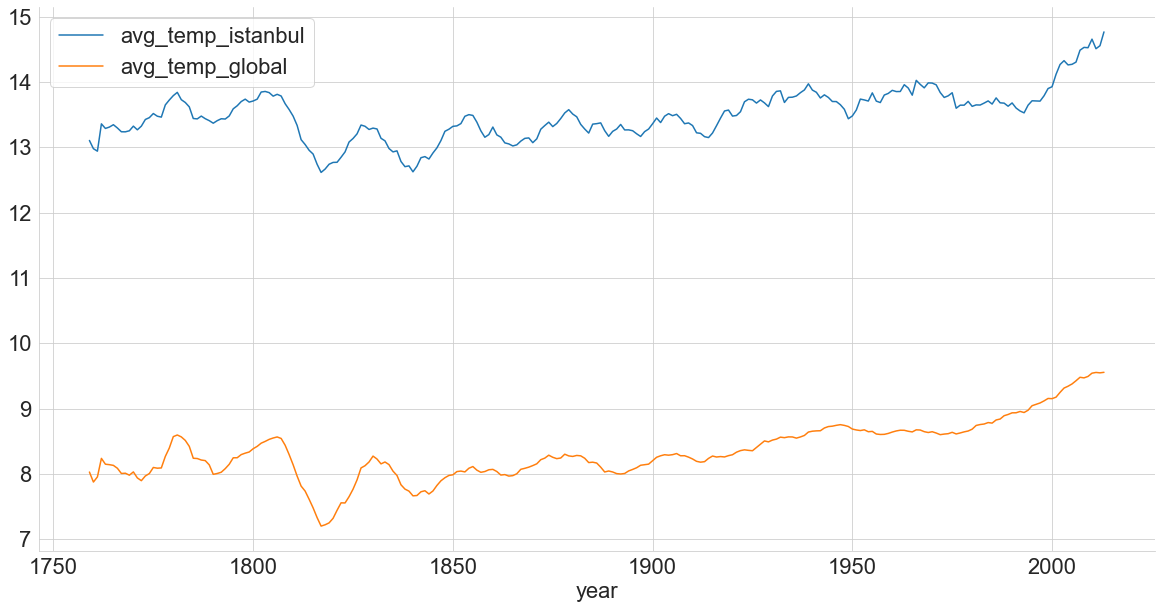

In [42]:
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 22})
rolling.plot(x="year", y=["avg_temp_istanbul", "avg_temp_global"], figsize=(20,10))
sns.despine()

- From the graph it can be global average temperature is lower than instabul 
- There was a slight dip in global temperatures over the early 1800s, but there has been an increasing trend of increasing temperature since the 1900s. 
- This means the world has been getting hotter since the 1900s
- The trend for the global temperature and instabul are similar. 
- There wasn't much temperature change between the 1850s and 1900
- The rise in tempertaure since 1900s could be due to industralisation in the early 1900s
